In [116]:
import numpy as np
import pandas as pd 
from statsmodels.formula import api as smf
from statsmodels import api as sm
from scipy.optimize import minimize
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Problem 1
## Calculated using the Statistical packages

In [126]:
np.random.seed(42)
data = np.random.normal(100,10, 100)
print("skewness：", stats.skew(data))
print("kurtosis：", stats.kurtosis(data))


skewness： -0.17526772024433832
kurtosis： -0.1554047077420786


## Calculated using our function


In [145]:
mean = np.mean(data)
std = np.std(data, ddof = 1)
n = len(data) 
skew = np.mean((data - mean)**3) / std**3
kurtosis = np.mean((data - mean)**4) / std**4 - 3
print("skewness：",skew)
print("kurtosis：", kurtosis)

skewness： -0.17264528797569992
kurtosis： -0.21201215405801133


# Problem 2


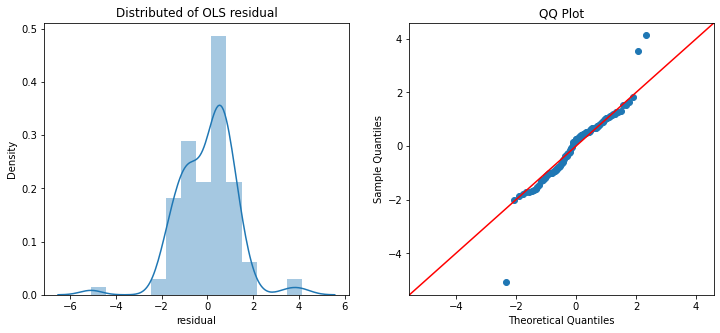

In [52]:
df = pd.read_csv("problem2.csv")

# using OLS and calculate the error vector
OLS = smf.ols('y~x', data = df).fit()

regression_params = []
regression_params.append(OLS.params.values)

residual = OLS.resid

OLS_MSE = np.mean(residual**2)

plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(residual)
plt.xlabel("residual")
plt.title("Distributed of OLS residual")

sm.qqplot(residual, line = '45', ax = plt.subplot(122))
plt.title("QQ Plot")
plt.show()

[0.11983624 0.60520482]


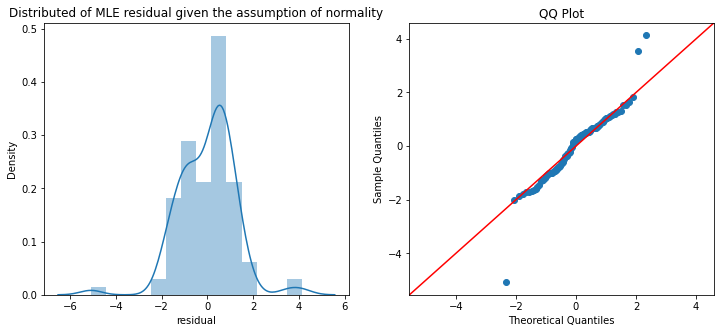

In [53]:

# Fit the data using MLE given the assumption of normality

X = sm.add_constant(df['x']).values
y = df['y'].values

def negative_Likelihood_func(beta):
    return sum((y - X @ beta)**2)

res = minimize(negative_Likelihood_func, beta_init)
if res['success']:
    beta = res['x']
    regression_params.append(beta)
    print(beta)
    normality_MLE_residual = y - X @beta

normality_MLE_MSE = np.mean(normality_MLE_residual**2)

plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(normality_MLE_residual)
plt.xlabel("residual")
plt.title("Distributed of MLE residual given the assumption of normality")

sm.qqplot(normality_MLE_residual, line = '45', ax = plt.subplot(122))
plt.title("QQ Plot")
plt.show()

[0.12368493 0.59503441]


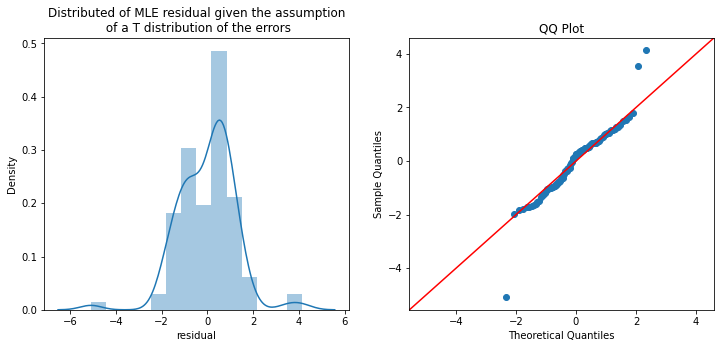

In [54]:
# fit the MLE using the assumption of a T distribution of the errors

X = sm.add_constant(df['x']).values
y = df['y'].values
n = X.shape[0] - X.shape[1] 

def negative_Likelihood_func(beta):
    total = 0 
    error = y - X @ beta
    for e in error:
        total += np.log(1 + e**2 / n)
    return total

res = minimize(negative_Likelihood_func, beta_init, method = 'SLSQP')
if res['success']:
    beta = res['x']
    regression_params.append(beta)
    print(beta)
    Tdistribution_MLE_residual = y - X @beta

Tdistribution_MLE_MSE = np.mean(Tdistribution_MLE_residual**2)

plt.figure(figsize = (12,5))
plt.subplot(121)
sns.distplot(Tdistribution_MLE_residual)
plt.xlabel("residual")
plt.title("Distributed of MLE residual given the assumption\n of a T distribution of the errors")

sm.qqplot(Tdistribution_MLE_residual, line = '45', ax = plt.subplot(122))
plt.title("QQ Plot")
plt.show()

In [55]:
summary_df = pd.DataFrame(regression_params, columns = ['regression intercept', 'regression slope'], 
                         index = ['OLS', 'MLE given the assumption of normality',
                          'MLE using the assumption of a T distribution of the errors'])

summary_df['MSE'] = [OLS_MSE, normality_MLE_MSE, Tdistribution_MLE_MSE]
summary_df

,regression intercept,regression slope,MSE
OLS,0.119836,0.605205,1.436148
MLE given the assumption of normality,0.119836,0.605205,1.436148
MLE using the assumption of a T distribution of the errors,0.123685,0.595034,1.436261


# Problem 3

In [77]:
# Generate AR(1) time series
phi_1 = 0.5
sigma_e = 1

n = 100
x = np.zeros(n)
e = np.random.normal(0, sigma_e, n)

for i in range(1, n):
    x[i] = phi_1 * x[i-1] + e[i]

AR1 = x

In [78]:
# Generate AR(2) time series
phi_1 = 0.5
phi_2 = 0.3
sigma_e = 1

n = 100
x = np.zeros(n)
e = np.random.normal(0, sigma_e, n)

for i in range(2, n):
    x[i] = phi_1 * x[i-1] + phi_2 * x[i-2] + e[i]

AR2 = x


In [79]:
# Generate AR(3) time series
phi_1 = 0.5
phi_2 = 0.3
phi_3 = 0.2
sigma_e = 1

n = 100
x = np.zeros(n)
e = np.random.normal(0, sigma_e, n)

for i in range(3, n):
    x[i] = phi_1 * x[i-1] + phi_2 * x[i-2] + phi_3 * x[i-3] + e[i]
AR3 = x

In [80]:
# Generate MA(1) time series
theta_1 = 0.5
sigma_e = 1
n = 100
x = np.zeros(n)
e = np.random.normal(0, sigma_e, n)
for i in range(1, n):
    x[i] = e[i] + theta_1 * e[i-1]
    
MA1 = x


In [110]:
# Generate MA(2) time series
theta_1 = 0.5
theta_2 = 0.3
sigma_e = 1

n = 100
x = np.zeros(n)
e = np.random.normal(0, sigma_e, n)
for i in range(2, n):
    x[i] = e[i] + theta_1 * e[i-1] + theta_2 * e[i-2]
MA2 = x


In [111]:
# Generate MA(3) time series
theta_1 = 0.5
theta_2 = 0.3
theta_3 = 0.2
sigma_e = 1

n = 100
x = np.zeros(n)
e = np.random.normal(0, sigma_e, n)

for i in range(3, n):
    x[i] = e[i] + theta_1 * e[i-1] + theta_2 * e[i-2] + theta_3 * e[i-3]
MA3 = x

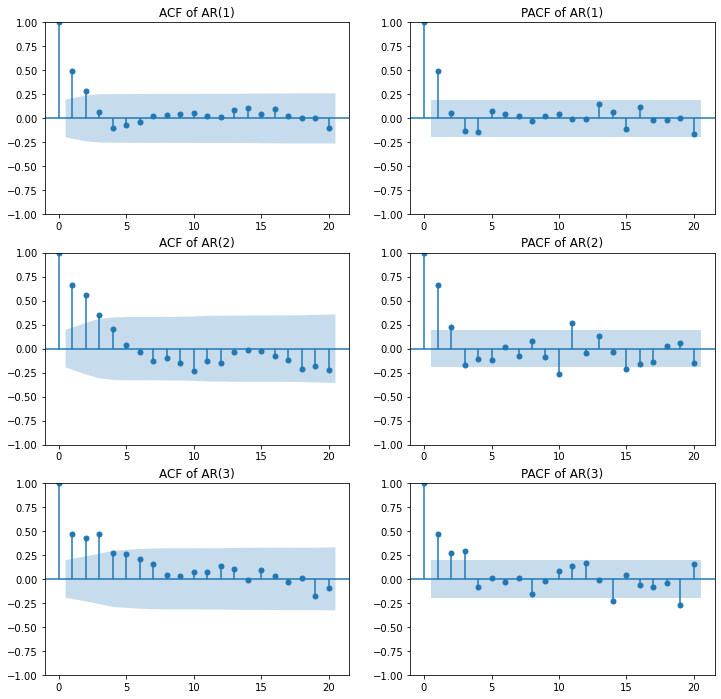

In [112]:
fig = plt.figure(figsize = (12,12))
axes = fig.subplots(3,2)
for i, AR in enumerate([AR1, AR2, AR3]):
    sm.graphics.tsa.plot_acf(AR, ax = axes[i,0])
    axes[i,0].set_title("ACF of AR({})".format(i+1))
    
    sm.graphics.tsa.plot_pacf(AR, ax = axes[i,1])
    axes[i,1].set_title("PACF of AR({})".format(i+1))
    
plt.show()

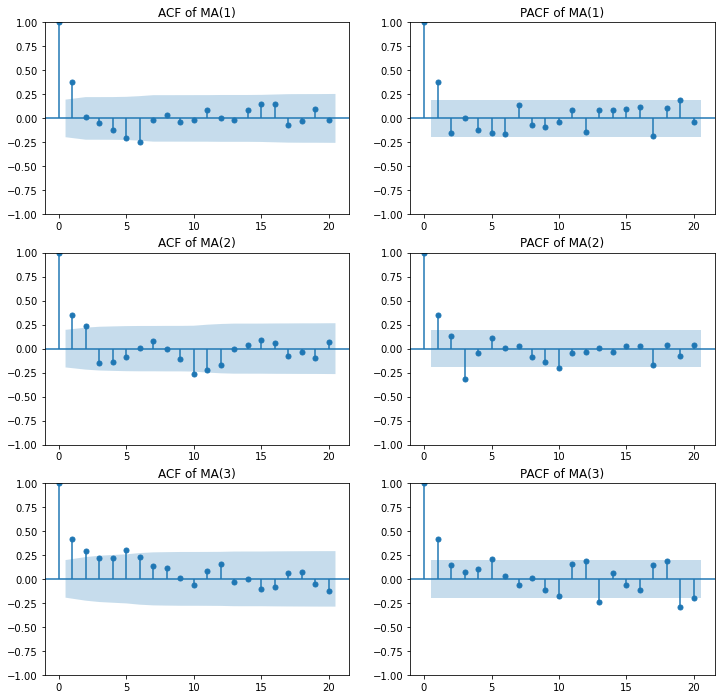

In [113]:
fig = plt.figure(figsize = (12,12))
axes = fig.subplots(3,2)
for i, MA in enumerate([MA1, MA2, MA3]):
    sm.graphics.tsa.plot_acf(MA, ax = axes[i,0])
    axes[i,0].set_title("ACF of MA({})".format(i+1))
    
    sm.graphics.tsa.plot_pacf(MA, ax = axes[i,1])
    axes[i,1].set_title("PACF of MA({})".format(i+1))
    
plt.show()